In [ ]:
# https://www.kaggle.com/puneetgrover/speed-up-your-algorithms-dask

In [ ]:
# dask_kaggle_DataFrame.ipynb

In [1]:
import dask.dataframe as dd
import numpy as np
import gc #This module provides access to the garbage collector for reference cycles.
gc.enable()

In [2]:
arr = np.random.normal(0.0, 1.0, size=(1000000, 10)) # mean, Standard deviation

In [3]:
arr[:10]

array([[-1.36323661,  2.38446705,  1.18178308, -0.24556572, -1.32007505,
         1.38198537,  0.53572249,  0.70374831, -1.02281693,  0.23679688],
       [-0.90432431,  0.57709229,  1.04019595, -1.04480831,  0.25255887,
         0.11435875, -0.04867637, -0.22769359,  0.3591488 , -0.54986255],
       [ 0.22400957, -1.05265214,  0.38932517,  1.30433841, -0.88071456,
         0.05522342, -0.15854726, -2.27318599,  0.23258101,  0.33796736],
       [-0.63910527,  0.90179762, -1.40119953,  0.78965127,  0.03705849,
        -1.27071784, -0.45951925,  0.5933747 ,  2.23610118,  1.57638857],
       [-0.14513621, -1.43131987, -1.35383763,  2.00634708, -0.97390522,
         0.37729227, -1.02836353,  0.85187586, -1.08615119,  1.25066221],
       [-1.28994877, -1.00997594,  2.04096839, -0.07559277,  0.32536635,
        -0.37237425,  1.00470341, -0.37223973, -0.81223224, -0.57018962],
       [-0.360444  , -2.88863766, -0.86318415, -0.27294033,  0.26974478,
        -1.6922456 , -1.14304758,  0.10392296

In [4]:
df = dd.from_array(arr, chunksize=50000, columns=[f"col-{i+1}" for i in range(10)])

In [5]:
del arr
gc.collect()

7

In [6]:
df

,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10
npartitions=20,,,,,,,,,,
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
50000,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...
950000,...,...,...,...,...,...,...,...,...,...
999999,...,...,...,...,...,...,...,...,...,...


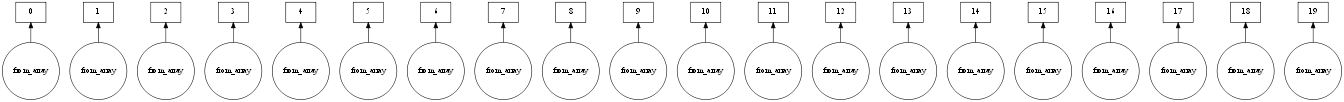

In [23]:
df.visualize(size="14,16!")

In [24]:
df.head() # Not lazy beacuse it doesn't take much computation

,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10
0,-1.363237,2.384467,1.181783,-0.245566,-1.320075,1.381985,0.535722,0.703748,-1.022817,0.236797
1,-0.904324,0.577092,1.040196,-1.044808,0.252559,0.114359,-0.048676,-0.227694,0.359149,-0.549863
2,0.224010,-1.052652,0.389325,1.304338,-0.880715,0.055223,-0.158547,-2.273186,0.232581,0.337967
3,-0.639105,0.901798,-1.401200,0.789651,0.037058,-1.270718,-0.459519,0.593375,2.236101,1.576389
4,-0.145136,-1.431320,-1.353838,2.006347,-0.973905,0.377292,-1.028364,0.851876,-1.086151,1.250662


In [25]:
df.tail()


,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10
49995,0.174438,0.717385,1.586265,0.012636,0.781112,0.219900,-0.581178,-1.078702,0.079659,-0.559220
49996,0.399879,-1.480585,0.103367,0.224304,-2.816442,0.772544,1.123806,-0.753490,0.294404,-1.197109
49997,1.645858,-0.563382,-1.053167,1.071631,0.437724,-0.285072,-0.211193,0.757224,-0.618034,-0.684681
49998,-1.206377,-0.278622,0.186421,-1.817696,-0.571048,-0.215797,1.631906,-1.669329,1.004994,2.214038
49999,1.281337,1.503638,0.441980,-0.534169,0.681075,-1.108902,1.402544,-0.236427,-1.269629,-0.282121


In [26]:
df["col-1"] = (df["col-1"]*10).astype(int)

In [27]:
agg = df.groupby(by=["col-1"]).aggregate(["sum", "std", "max", "min", "mean"])

In [28]:
agg.head(2)


col-2                                       col-3                \
            sum std       max       min      mean       sum std       max   
col-1                                                                       
-51   -1.975612 NaN -1.975612 -1.975612 -1.975612 -1.322298 NaN -1.322298   
-45   -1.595164 NaN -1.595164 -1.595164 -1.595164  0.758596 NaN  0.758596   

                             ...        col-9                          \
            min      mean    ...          sum std       max       min   
col-1                        ...                                        
-51   -1.322298 -1.322298    ...     0.122143 NaN  0.122143  0.122143   
-45    0.758596  0.758596    ...    -2.389874 NaN -2.389874 -2.389874   

                   col-10                                    
           mean       sum std       max       min      mean  
col-1                                                        
-51    0.122143  1.255328 NaN  1.255328  1.255328  1.255328  
-45   -2.389874 -0.407988 NaN -0.407988 -0.407988 -0.407988  

[2 rows x 45 columns]

In [29]:
columns = []
for col in agg.columns.levels[0]:
  for a in agg.columns.levels[1]:
    columns.append(f"{col}.{a}")

In [30]:
agg.columns = columns
agg.head(2)

,col-10.max,col-10.mean,col-10.min,col-10.std,col-10.sum,col-2.max,col-2.mean,col-2.min,col-2.std,col-2.sum,...,col-8.max,col-8.mean,col-8.min,col-8.std,col-8.sum,col-9.max,col-9.mean,col-9.min,col-9.std,col-9.sum
col-1,,,,,,,,,,,,,,,,,,,,,
-51,-1.975612,NaN,-1.975612,-1.975612,-1.975612,-1.322298,NaN,-1.322298,-1.322298,-1.322298,...,0.122143,NaN,0.122143,0.122143,0.122143,1.255328,NaN,1.255328,1.255328,1.255328
-45,-1.595164,NaN,-1.595164,-1.595164,-1.595164,0.758596,NaN,0.758596,0.758596,0.758596,...,-2.389874,NaN,-2.389874,-2.389874,-2.389874,-0.407988,NaN,-0.407988,-0.407988,-0.407988


In [31]:
df_new = df.merge(agg.reset_index(), how="left", on="col-1")

In [32]:
df_new

,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10,col-10.max,col-10.mean,col-10.min,col-10.std,col-10.sum,col-2.max,col-2.mean,col-2.min,col-2.std,col-2.sum,col-3.max,col-3.mean,col-3.min,col-3.std,col-3.sum,col-4.max,col-4.mean,col-4.min,col-4.std,col-4.sum,col-5.max,col-5.mean,col-5.min,col-5.std,col-5.sum,col-6.max,col-6.mean,col-6.min,col-6.std,col-6.sum,col-7.max,col-7.mean,col-7.min,col-7.std,col-7.sum,col-8.max,col-8.mean,col-8.min,col-8.std,col-8.sum,col-9.max,col-9.mean,col-9.min,col-9.std,col-9.sum
npartitions=20,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


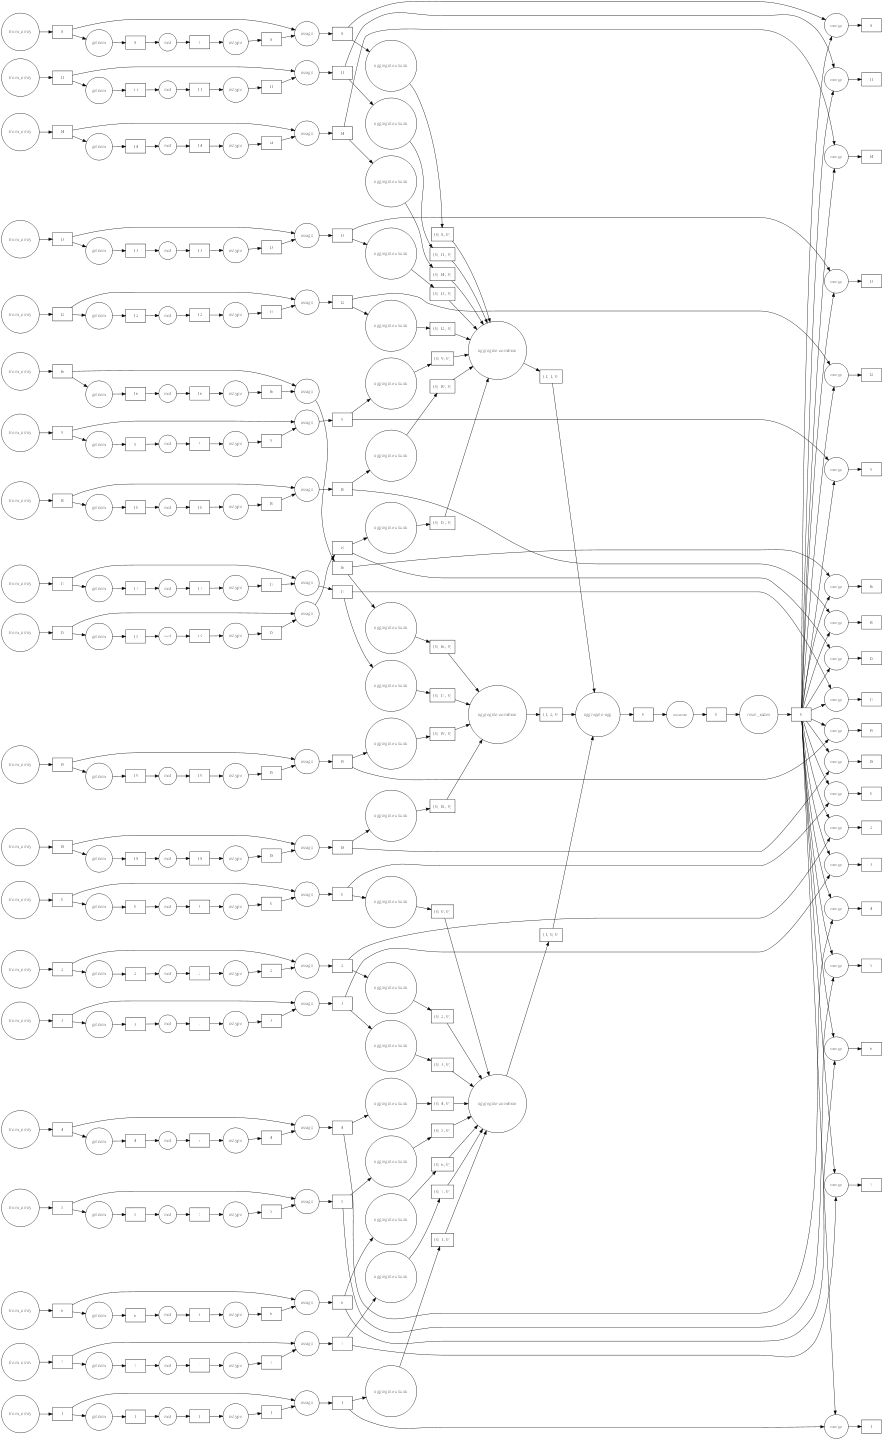

In [33]:
df_new.visualize(rankdir="LR", size="20, 15!")


In [34]:
df_new.compute().head()

,col-1,col-2,col-3,col-4,col-5,col-6,col-7,col-8,col-9,col-10,...,col-8.max,col-8.mean,col-8.min,col-8.std,col-8.sum,col-9.max,col-9.mean,col-9.min,col-9.std,col-9.sum
0,-13,2.384467,1.181783,-0.245566,-1.320075,1.381985,0.535722,0.703748,-1.022817,0.236797,...,78.031348,0.998216,3.715830,-3.617660,0.004823,-69.830117,0.997748,3.508019,-3.829234,-0.004316
1,-9,0.577092,1.040196,-1.044808,0.252559,0.114359,-0.048676,-0.227694,0.359149,-0.549863,...,33.140079,1.000246,3.749358,-3.507689,0.001302,101.127976,1.001217,4.064245,-3.889862,0.003973
2,2,-1.052652,0.389325,1.304338,-0.880715,0.055223,-0.158547,-2.273186,0.232581,0.337967,...,203.263077,1.001611,4.660724,-5.119756,0.005243,-9.526899,1.005411,3.834707,-4.249254,-0.000246
3,-6,0.901798,-1.401200,0.789651,0.037058,-1.270718,-0.459519,0.593375,2.236101,1.576389,...,298.030368,0.994681,3.730290,-4.000965,0.009232,254.113138,1.002292,4.325688,-3.927381,0.007872
4,-1,-1.431320,-1.353838,2.006347,-0.973905,0.377292,-1.028364,0.851876,-1.086151,1.250662,...,-33.897949,1.000987,4.719107,-4.144095,-0.000859,138.312886,1.003443,4.014095,-4.114767,0.003507


In [37]:
df_new.shape[0].compute()

1000000

In [36]:
df_new.shape[1]

55